In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [45]:
raw_data = pd.read_csv('Data_from_mails.csv')

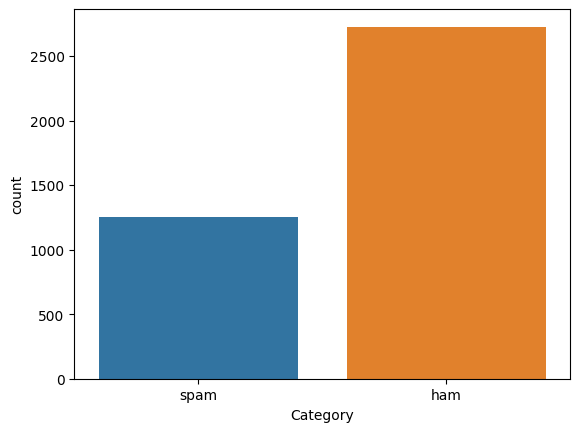

In [84]:
sns.countplot(x='Category', data=raw_data)
plt.show()

In [47]:
mail_data = raw_data.where((pd.notnull(raw_data)),'')

In [48]:
mail_data.head()

,TimeStamp,Thread Count,From Email,To Email,Mail Subject,Email Content,Category
0,26-08-2023,1,cloudHQ <support@cloudhq.net>,cs22btech11029@iith.ac.in,Backup Emails to Google Sheets: free quota rea...,\nYou hit your free tier limit - please upgra...,spam
1,26-08-2023,1,cloudHQ <support@cloudhq.net>,cs22btech11029@iith.ac.in,Seeing is believing: Save this email to Google...,\nWelcome to Emails to Sheets! ‌ ‌ ‌ ‌ ‌ ‌ ...,ham
2,26-08-2023,3,Google <no-reply@accounts.google.com>,cs22btech11029@iith.ac.in,Security alert,[image: Google]\r\nApp password created to sig...,ham
3,26-08-2023,3,Google <no-reply@accounts.google.com>,cs22btech11029@iith.ac.in,Security alert,[image: Google]\r\nApp password used to sign i...,ham
4,26-08-2023,3,Google <no-reply@accounts.google.com>,cs22btech11029@iith.ac.in,Security alert,[image: Google]\r\nApp password created to sig...,ham


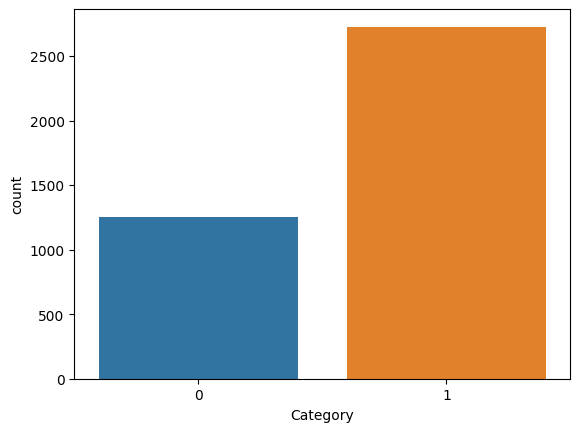

In [83]:
sns.countplot(x='Category', data=mail_data)
plt.show()

In [49]:
mail_data.shape

(3979, 7)

In [50]:
mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [53]:
X = mail_data['Mail Subject']+mail_data['Email Content']

Y = mail_data['Category']

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [57]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(3979,)
(3183,)
(796,)


In [68]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=bool(True))
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [69]:
print(X_train)

3974    Re: Reg. Aalla Sai Chakradhar APS-IDear all,\r...
2298    Re: Kuchipudi trainingDear All\r\n\r\nThis is ...
1177    Enhancing the aspirations of students of nearb...
1090    Open Colloquium Anouncement Mr Amandeep SIngh,...
2191    Re: Regarding Mess Food in Tiffin BoxI don't k...
                              ...                        
3000    Room Decor items and Organizers for saleHello ...
1667    Items for saleHello everyone,\r\nSorry for spa...
3321    Re: Geotechnical Engineering Industrial Semina...
1688    New announcement: "@Batch-2 students: \n\nDue ...
1898    Re: Viva voce examination of Mr. Muneshwar Nan...
Length: 3183, dtype: object


In [70]:
print(X_train_features)

  (0, 13515)	0.03577728201553295
  (0, 2585)	0.03921051422254323
  (0, 7706)	0.1161868749170358
  (0, 18500)	0.03862781513757156
  (0, 26991)	0.034468129740195405
  (0, 27295)	0.0365369521852366
  (0, 10816)	0.037919919903099904
  (0, 26889)	0.03320155551380358
  (0, 23472)	0.03607617836052652
  (0, 11671)	0.03370167428116442
  (0, 21938)	0.03660404398622345
  (0, 24632)	0.03694445665236723
  (0, 26411)	0.06936235223719205
  (0, 13729)	0.06951893142606265
  (0, 13733)	0.07583983980619981
  (0, 24811)	0.038421847811972824
  (0, 17929)	0.031180732185905623
  (0, 21937)	0.03444892310210357
  (0, 24246)	0.014870352267600027
  (0, 17544)	0.014875034836838337
  (0, 26530)	0.014860991866701397
  (0, 23495)	0.014665868015793655
  (0, 11659)	0.028299346533942452
  (0, 9453)	0.014879718986690767
  (0, 25501)	0.014875034836838337
  :	:
  (3182, 26530)	0.012320127768566917
  (3182, 23495)	0.012158365297027945
  (3182, 11659)	0.03519128146281434
  (3182, 9453)	0.012335653011637892
  (3182, 25501)	0

In [71]:
model = LogisticRegression()

In [72]:
model.fit(X_train_features, Y_train)

LogisticRegression()

In [73]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [74]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9214577442664154


In [75]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [76]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9020100502512562
